In [209]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [210]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [211]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [212]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [213]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [214]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [215]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [216]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=4,
    batch_size=64
)

Epoch 1/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 68s 89ms/step - accuracy: 0.8537 - loss: 0.4552 - val_accuracy: 0.9802 - val_loss: 0.0672
Epoch 2/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.9767 - loss: 0.0754 - val_accuracy: 0.9844 - val_loss: 0.0454
Epoch 3/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 61s 82ms/step - accuracy: 0.9865 - loss: 0.0452 - val_accuracy: 0.9865 - val_loss: 0.0421
Epoch 4/4
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.9883 - loss: 0.0360 - val_accuracy: 0.9887 - val_loss: 0.0409


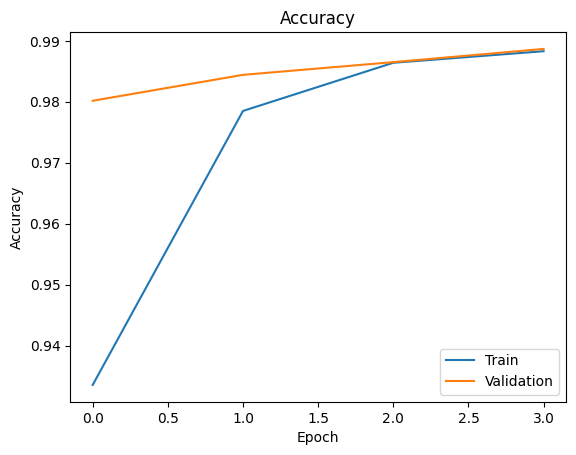

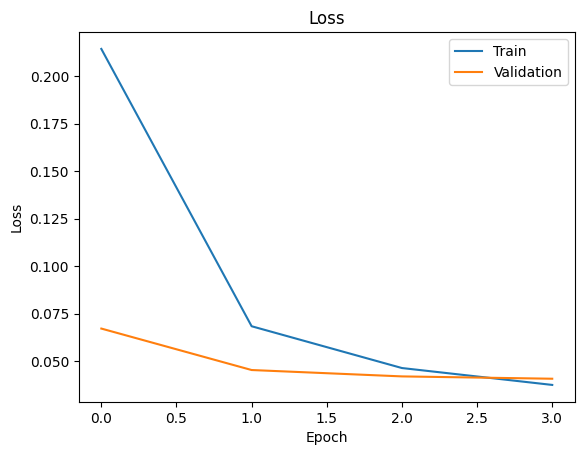

In [217]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [218]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9852 - loss: 0.0420
Test Accuracy: 0.9879000186920166


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Digit: 2
Actual Digit: 2


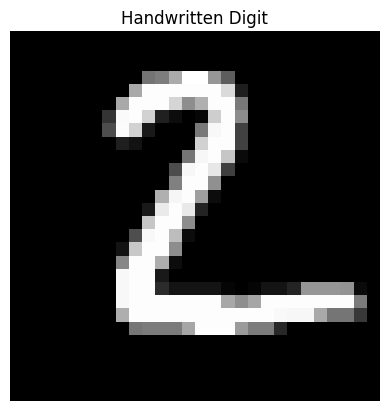

In [227]:
index = 1
sample = x_test[index].reshape(1,28,28,1)
pred = model.predict(sample)

print("Predicted Digit:", np.argmax(pred))
print("Actual Digit:", np.argmax(y_test[index]))

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Handwritten Digit")
plt.axis('off')
plt.show()